📊 Notebook 2: Customer Segmentation & Retention
Phase 1

What This Workflow Does
Loads the customer dataset you created

Explores for quick understanding (missing values, churn distribution)

Clusters customers into engagement-based segments

Profiles each segment and churn rate differences

Dataset shape: (1000, 8)

Missing values per column:
CustomerID              0
Age                     0
Gender                  0
Region                  0
SubscriptionType        0
TenureMonths            0
AvgMonthlyWatchHours    0
Churned                 0
dtype: int64

Basic statistics:
              Age  TenureMonths  AvgMonthlyWatchHours      Churned
count  1000.00000   1000.000000            1000.00000  1000.000000
mean     43.81900     30.652000              25.25510     0.151000
std      14.99103     17.058074              14.03197     0.358228
min      18.00000      1.000000               1.00000     0.000000
25%      31.00000     16.000000              13.27500     0.000000
50%      44.00000     30.000000              25.50000     0.000000
75%      56.00000     46.000000              37.00000     0.000000
max      69.00000     59.000000              49.90000     1.000000


C:\Users\Nicho\AppData\Local\Temp\ipykernel_13872\682979510.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churned", palette="coolwarm")


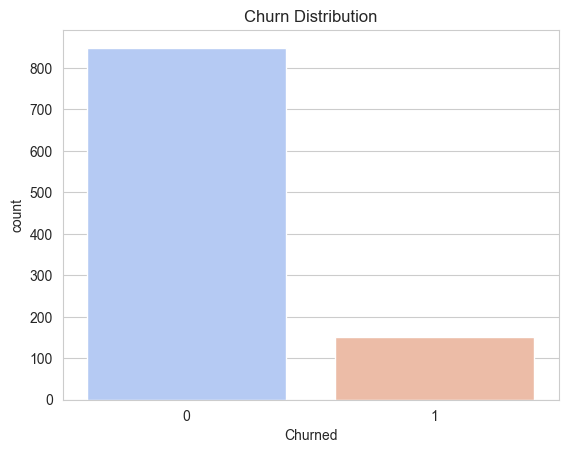

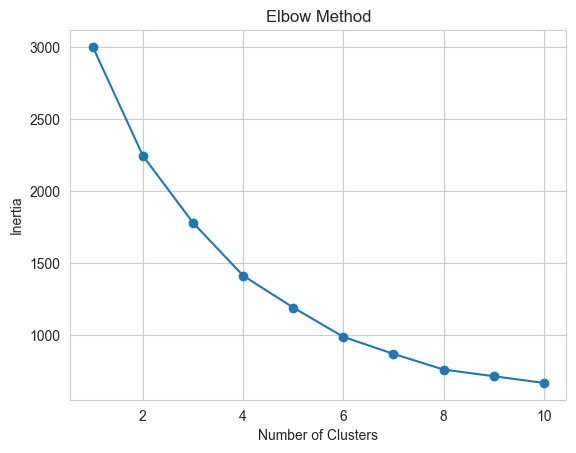

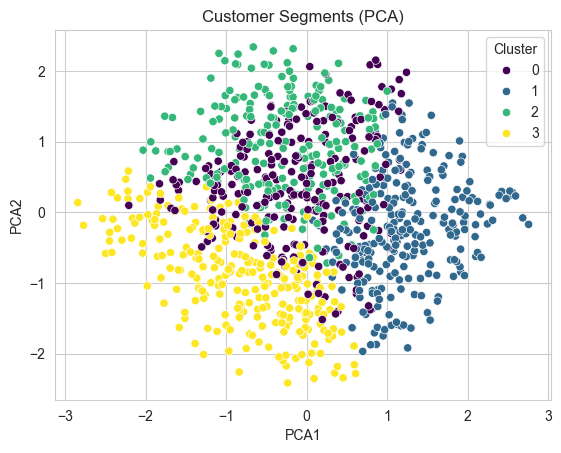


Cluster Profiles:
               Age  TenureMonths  AvgMonthlyWatchHours   Churned      PCA1  \
Cluster                                                                      
0        56.449799     24.638554             36.722490  0.156627 -0.155018   
1        53.202290     40.950382             12.498855  0.175573  1.231559   
2        30.895928     45.796380             31.967421  0.140271 -0.285046   
3        33.567164     13.682836             21.536194  0.130597 -0.824901   

             PCA2  
Cluster            
0        0.352326  
1       -0.220480  
2        0.949429  
3       -0.894729  

Churn Rate by Cluster:
Cluster
0    0.156627
1    0.175573
2    0.140271
3    0.130597
Name: Churned, dtype: float64


In [2]:
# -------------------------------------------------
# 1. Import libraries
# -------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

# -------------------------------------------------
# 2. Load dataset
# -------------------------------------------------
df = pd.read_csv("flo_sports_customers.csv")

print("Dataset shape:", df.shape)
df.head()

# -------------------------------------------------
# 3. Quick exploration
# -------------------------------------------------
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics:")
print(df.describe())

# Churn distribution
sns.countplot(data=df, x="Churned", palette="coolwarm")
plt.title("Churn Distribution")
plt.show()

# -------------------------------------------------
# 4. Feature selection for clustering
# -------------------------------------------------
features = ["Age", "TenureMonths", "AvgMonthlyWatchHours"]
X = df[features]

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------------------------
# 5. Find optimal number of clusters (Elbow Method)
# -------------------------------------------------
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# -------------------------------------------------
# 6. Apply K-Means with chosen k
# -------------------------------------------------
optimal_k = 4  # Change this after elbow curve inspection
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# -------------------------------------------------
# 7. Visualize clusters (PCA for 2D)
# -------------------------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis")
plt.title("Customer Segments (PCA)")
plt.show()

# -------------------------------------------------
# 8. Segment profiling
# -------------------------------------------------
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
print("\nCluster Profiles:")
print(cluster_profile)

# Churn rate by cluster
churn_by_cluster = df.groupby("Cluster")["Churned"].mean()
print("\nChurn Rate by Cluster:")
print(churn_by_cluster)


               Age  TenureMonths  AvgMonthlyWatchHours   Churned      PCA1  \
Cluster                                                                      
0        56.449799     24.638554             36.722490  0.156627 -0.155018   
1        53.202290     40.950382             12.498855  0.175573  1.231559   
2        30.895928     45.796380             31.967421  0.140271 -0.285046   
3        33.567164     13.682836             21.536194  0.130597 -0.824901   

             PCA2  
Cluster            
0        0.352326  
1       -0.220480  
2        0.949429  
3       -0.894729  


C:\Users\Nicho\AppData\Local\Temp\ipykernel_13872\750265056.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_segment.index, y=churn_by_segment.values, palette="coolwarm")


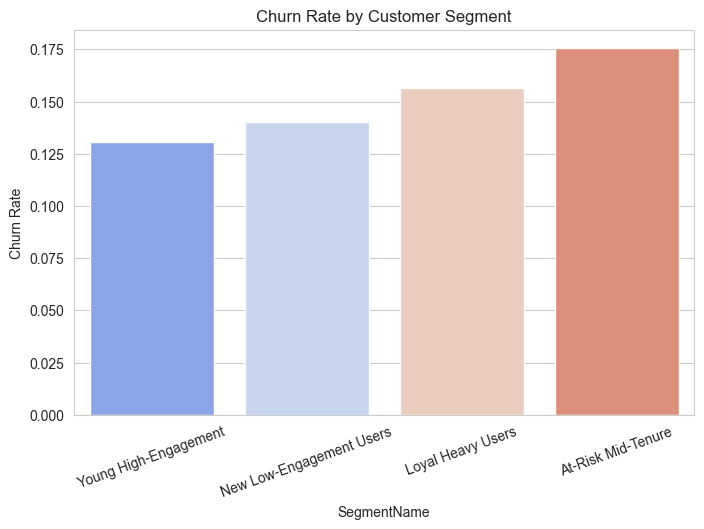

C:\Users\Nicho\AppData\Local\Temp\ipykernel_13872\750265056.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


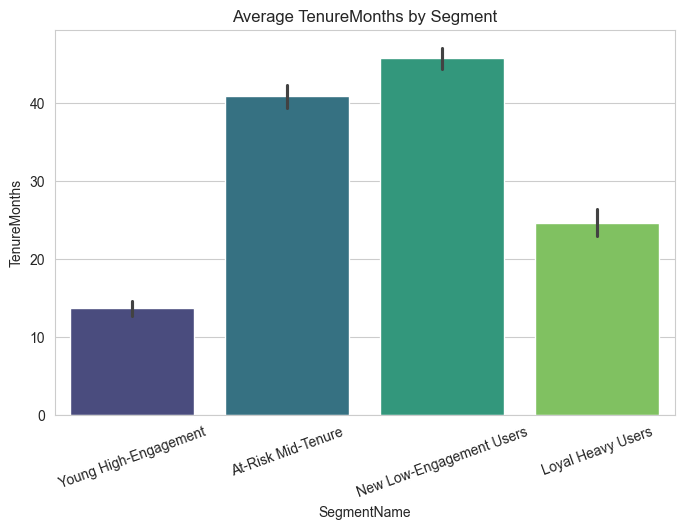

C:\Users\Nicho\AppData\Local\Temp\ipykernel_13872\750265056.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


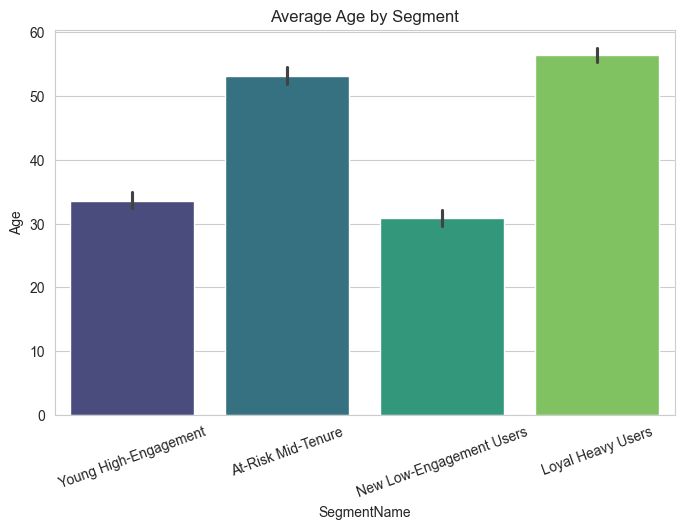

C:\Users\Nicho\AppData\Local\Temp\ipykernel_13872\750265056.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


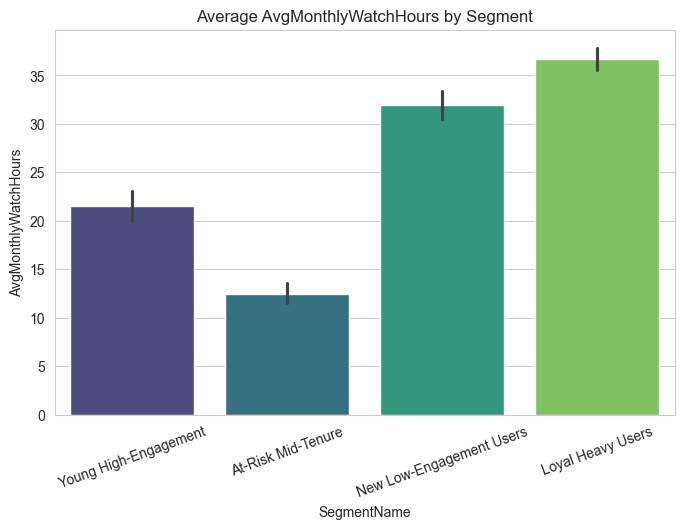


Segment Summary:
                          Customers  AvgAge  AvgTenure  AvgWatchHours  \
SegmentName                                                             
Young High-Engagement           268   33.57      13.68          21.54   
New Low-Engagement Users        221   30.90      45.80          31.97   
Loyal Heavy Users               249   56.45      24.64          36.72   
At-Risk Mid-Tenure              262   53.20      40.95          12.50   

                          ChurnRate  
SegmentName                          
Young High-Engagement          0.13  
New Low-Engagement Users       0.14  
Loyal Heavy Users              0.16  
At-Risk Mid-Tenure             0.18  

Segmented dataset saved as 'flo_sports_customers_segmented.csv'


In [3]:
# -------------------------------------------------
# 9. Assign descriptive names to clusters
# -------------------------------------------------
# Inspect cluster_profile to decide naming logic
cluster_profile = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_profile)

# Example naming based on Age, Tenure, and Watch Hours
# (Adjust thresholds to match your data distribution)
segment_names = {
    0: "Loyal Heavy Users",         # High tenure, high watch hours
    1: "At-Risk Mid-Tenure",        # Mid tenure, moderate watch hours, higher churn
    2: "New Low-Engagement Users",  # Low tenure, low watch hours
    3: "Young High-Engagement"      # Young, high watch hours, moderate tenure
}

df["SegmentName"] = df["Cluster"].map(segment_names)

# -------------------------------------------------
# 10. Churn rate by segment
# -------------------------------------------------
churn_by_segment = df.groupby("SegmentName")["Churned"].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=churn_by_segment.index, y=churn_by_segment.values, palette="coolwarm")
plt.xticks(rotation=20)
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Customer Segment")
plt.show()

# -------------------------------------------------
# 11. Average tenure, age, watch hours by segment
# -------------------------------------------------
metrics = ["TenureMonths", "Age", "AvgMonthlyWatchHours"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=df,
        x="SegmentName",
        y=metric,
        estimator=np.mean,
        palette="viridis"
    )
    plt.xticks(rotation=20)
    plt.title(f"Average {metric} by Segment")
    plt.ylabel(metric)
    plt.show()

# -------------------------------------------------
# 12. Segment summary table
# -------------------------------------------------
segment_summary = df.groupby("SegmentName").agg(
    Customers=("SegmentName", "count"),
    AvgAge=("Age", "mean"),
    AvgTenure=("TenureMonths", "mean"),
    AvgWatchHours=("AvgMonthlyWatchHours", "mean"),
    ChurnRate=("Churned", "mean")
).sort_values(by="ChurnRate")

print("\nSegment Summary:")
print(segment_summary.round(2))

# -------------------------------------------------
# 13. Save enriched dataset with segment names
# -------------------------------------------------
df.to_csv("flo_sports_customers_segmented.csv", index=False)
print("\nSegmented dataset saved as 'flo_sports_customers_segmented.csv'")


# Phase 2: Customer Segmentation and Phase 3: Sentiment Analysis combined report

# Sections

1.Executive Summary – quick snapshot of customer base, segments, and sentiment balance.

2.Customer Segmentation – table + chart of segment distribution.

3.Sentiment Analysis – distribution + segment-level sentiment chart.

4.Insights & Recommendations – automatically generated from the data.






In [2]:
import pandas as pd
import random
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import os
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4
from reportlab.lib import colors

# 1. Load the data
df = pd.read_csv("flo_sports_customers.csv")

# 2. Simulate customer segments if not already in data
if 'segment' not in df.columns:
    segments = ['Loyal', 'At Risk', 'New', 'Churned']
    df['segment'] = [random.choice(segments) for _ in range(len(df))]

# 3. Simulate survey comments
positive_comments = [
    "Absolutely love the coverage of my favorite sports!",
    "Great value for money, will recommend to friends.",
    "The streaming quality is excellent and smooth.",
    "Customer service was fast and helpful.",
    "I enjoy the variety of sports available."
]
neutral_comments = [
    "It's okay, nothing exceptional.",
    "Service is fine, meets my expectations.",
    "The experience is average.",
    "No major issues, but not amazing either.",
    "It's just like other platforms."
]
negative_comments = [
    "Too many buffering issues during live games.",
    "The subscription is too expensive for the value.",
    "Customer support took too long to respond.",
    "Limited coverage for my favorite sports.",
    "Not user-friendly on mobile devices."
]
all_comments = positive_comments + neutral_comments + negative_comments

if 'survey_comment' not in df.columns:
    df['survey_comment'] = [random.choice(all_comments) for _ in range(len(df))]

# 4. Sentiment analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['survey_comment'].apply(get_sentiment)

# 5. Create charts folder
os.makedirs("charts", exist_ok=True)

# --- Segmentation Chart ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='segment', order=df['segment'].value_counts().index, palette='viridis')
plt.title("Customer Segment Distribution")
plt.tight_layout()
segment_chart_path = "charts/segment_distribution.png"
plt.savefig(segment_chart_path)
plt.close()

# --- Sentiment Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Overall Sentiment Distribution")
plt.tight_layout()
sentiment_chart_path = "charts/sentiment_distribution.png"
plt.savefig(sentiment_chart_path)
plt.close()

# --- Sentiment by Segment ---
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='segment', hue='sentiment', palette='coolwarm')
plt.title("Sentiment by Customer Segment")
plt.tight_layout()
sentiment_by_segment_chart_path = "charts/sentiment_by_segment.png"
plt.savefig(sentiment_by_segment_chart_path)
plt.close()

# 6. Save updated CSV
df.to_csv("flo_sports_customers_with_segments_sentiment.csv", index=False)

# 7. PDF Report
report_filename = "FloSports_Customer_Insights_Report.pdf"
doc = SimpleDocTemplate(report_filename, pagesize=A4)
styles = getSampleStyleSheet()
story = []

# --- Title ---
story.append(Paragraph("FloSports Customer Insights Report", styles['Title']))
story.append(Spacer(1, 12))
story.append(Paragraph("Executive Summary", styles['Heading2']))

# Summary text
seg_counts = df['segment'].value_counts()
sent_counts = df['sentiment'].value_counts()
summary_text = f"""
This combined report provides both retention insights and satisfaction trends.

Customer Segments:
- Loyal: {seg_counts.get('Loyal', 0)}
- At Risk: {seg_counts.get('At Risk', 0)}
- New: {seg_counts.get('New', 0)}
- Churned: {seg_counts.get('Churned', 0)}

Sentiment Overview:
- Positive: {sent_counts.get('Positive', 0)}
- Neutral: {sent_counts.get('Neutral', 0)}
- Negative: {sent_counts.get('Negative', 0)}
"""
story.append(Paragraph(summary_text, styles['Normal']))
story.append(Spacer(1, 12))

# --- Segmentation Section ---
story.append(Paragraph("Customer Segmentation", styles['Heading2']))
story.append(Image(segment_chart_path, width=400, height=300))
story.append(Spacer(1, 12))

# --- Sentiment Section ---
story.append(Paragraph("Sentiment Analysis", styles['Heading2']))
story.append(Image(sentiment_chart_path, width=400, height=300))
story.append(Spacer(1, 12))
story.append(Image(sentiment_by_segment_chart_path, width=400, height=300))
story.append(Spacer(1, 12))

# --- Insights Section ---
story.append(Paragraph("Insights & Recommendations", styles['Heading2']))

insights = []
if sent_counts.get('Negative', 0) > sent_counts.get('Positive', 0):
    insights.append("Customer satisfaction is low; consider improving streaming quality and support response times.")
if seg_counts.get('At Risk', 0) > seg_counts.get('Loyal', 0):
    insights.append("Retention strategies needed — loyalty rewards, discounts, or targeted engagement.")
if sent_counts.get('Positive', 0) > sent_counts.get('Negative', 0):
    insights.append("Overall satisfaction is strong, but monitor 'At Risk' segments for churn prevention.")

if not insights:
    insights.append("Maintain current strategies while monitoring for changes in sentiment or retention.")

for ins in insights:
    story.append(Paragraph(f"- {ins}", styles['Normal']))

# --- Build PDF ---
doc.build(story)
print(f"✅ Combined PDF saved as {report_filename}")


C:\Users\Nicho\AppData\Local\Temp\ipykernel_12868\3257017006.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='segment', order=df['segment'].value_counts().index, palette='viridis')
C:\Users\Nicho\AppData\Local\Temp\ipykernel_12868\3257017006.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


✅ Combined PDF saved as FloSports_Customer_Insights_Report.pdf
